# Machine Learning

In [49]:
from sklearn.model_selection import train_test_split

** Splitting the data into train and test sets for carrying out the regression models. (training set : test set = 0.8:0.2) ###

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Linear Regression Model  -> Baseline Model


We have decided to use regression models to predict the price of diamonds as we are dealing with a combination of numerical and categorcial data (carat is numerical and the rest are categorical).

So we are going to use Linear regression as a baseline model.

It is used as the baseline to compare with other models that we are going to use.

Why we choose linear regression as the baseline?

Firstly, it is a simple and basic model that is easy to understand and implement.

Also, it provides a simple and interpretable reference point for evaluating the performance of other, more sophisticated machine learning algorithms such as random forest regression and XGBoost Regression. 

### Performace measure metrics ###

For our performance matrics we are using Root Mean Square Error (RMSE) and R-Squared (R^2) values to determine the accuracy of our models.

Why are we using both RMSE and R^2?

RMSE is a measure of the "root" or "average" of the squared errors, which makes it a popular choice for evaluating the performance of regression models. Lower RMSE values indicate better model performance. RMSE is sensitive to outliers, as the squared differences can be heavily influenced by large errors.

R^2:  It is expressed as a value between 0 and 1, with 1 indicating a perfect fit
R^2 measures how strongly one variable is connected to other.It is the square of the correlation coefficient between 𝑥 and 𝑦 which in this case x is the predictor variables and y is the response variable.

Training data RMSE :  1284.219225
Training data R^2 score: 0.8603930383951965
..................................
Test data RMSE :  1266.348190
Test data R^2 score: 0.8620529711225817


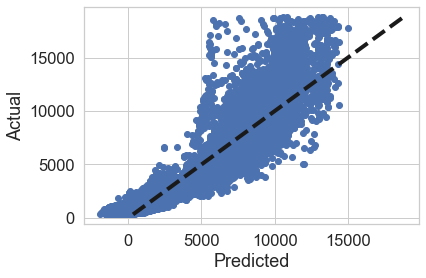

In [51]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
# sklearn method, which doesn't give much additional info
import numpy as np 

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_train)

# RMSE and R^2 Computation for training data
rmse_train = np.sqrt(MSE(y_train, y_pred))
print("Training data RMSE : % f" %(rmse_train))
print(f'Training data R^2 score: {model.score(X_train, y_train)}')

print("..................................")

y_pred_test = model.predict(X_test)

# RMSE and R^2 Computation for test data
rmse_test = np.sqrt(MSE(y_test, y_pred_test))
print("Test data RMSE : % f" %(rmse_test))
print(f'Test data R^2 score: {model.score(X_test, y_test)}')

# Calculate the R-squared value
#r2 = r2_score(y_train, y_pred)

# Plot the linear regression curve
fig, ax = plt.subplots()
ax.scatter(y_pred, y_train)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
#ax.set_title('Linear Regression Curve (R-squared = {:.2f})'.format(r2))
plt.show()

## Random Forest Regression V1 ##

We have used `Linear Regression Model ` as the baseline for our other models. Firstly , the model we are going to use is Random Forest Regression.  

Why are we using `Random Forest Regression`?

Random forest regression are capable of modeling non-linear relationships between features and target, while linear regression assumes a linear relationship between the features and the target. After our research, we found that the relationship between the predicators and price of diamond might not be completely linear. 

Also, in random forest regression  the meta estimator fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

Lastly, each of the trees makes its own individual prediction. 

These predictions are then averaged to produce a single result. 

### Performace measure metrics ###

We have also used `R^2` score as well as `RMSE`  to measure the performance of Random Forest Regression models.

Through this we can eliminate factors that might affect our model such as overfitting of the training data/ or any errors on the anonymous data. 

Training data RMSE :  1032.615467
Training data R^2 :  0.909738
......................
Test data RMSE :  1036.257609
Test data R^2 :  0.907628


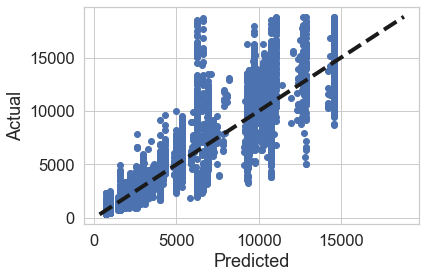

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np 
from sklearn.metrics import mean_squared_error as MSE

# Validation using out-of-bag method
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=0,max_depth = 4)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_train)

#performance measure of the training model
# RMSE & R^2 Computation
rmse = np.sqrt(MSE(y_train, y_pred))
print("Training data RMSE : % f" %(rmse))
r2 = r2_score(y_train, y_pred)
print("Training data R^2 : % f" %(r2))

print("......................")
#performance measure of the test data
#RMSE & R^2 computation

y_pred_test= rf.predict(X_test)

rmse_test = np.sqrt(MSE(y_test, y_pred_test))
print("Test data RMSE : % f" %(rmse_test))
r2_test = r2_score(y_test, y_pred_test)
print("Test data R^2 : % f" %(r2_test))


# Plot the linear regression curve
fig, ax = plt.subplots()
ax.scatter(y_pred, y_train)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

### Why results of random forest regression seems to be better than Linear Regression? ###

 Random forest gave us better accuracy of 90% compared to Linear Regression (86%) due to multiple factors that I will explain below:
 
1. Random forest regressors are capable of modeling non-linear relationships between features and target, while linear regression assumes a linear relationship between the features and the target. The relationship between the features and target might be non-linear. For example we found out that a well-cut diamond can appear more brilliant and valuable, while a poorly cut diamond may look dull and less valuable. However, the relationship between `cut` and `price` may not be `perfectly linear`, as there can be other factors such as diamond shape, depth, and symmetry that also affect a diamond's value

---

2. Linear regression assumes that the features are normally distributed, while random forest regressors do not make any assumptions about the distribution of the features. In our dataset we have categorical features such as cut, clarity which cannot be normally distributed as they are data with discrete levels and not continuuous data thus, a random forest regressor is a better choice 

---

Thus, we believe these are the reasons why Random Forest Regression gave us a better accuracy than linear Regression.


## 'Tuning of Hyperparameters' for the Random Forest Regression ###

Even Though, our current model of Random Forest Regression seems to be doing okay based on the RMSE and R^2 values,
we believe that tuning the hyperparameters of the model can improve its accuracy and for learning purposes we decided to try tuning of the hyperparameters available to try to make our model better.

For that we checked sklearn and found that the two major parameters (actually, called the *hyper-parameters* of this model) of Random Forest are `n_estimators` (the number of decision trees in the forest) and `max_depth` (of each decision tree in the forest). So, we will try to adjust the values of the parameters individually for each version of the random forest model and compare the performace between them.

## Random Forest Regression V2 # 

### Increase the Number of Decision Trees in the Forest ->> change the n_estimators to 1000

Training data RMSE :  1034.871938
Training data R^2 :  0.909343
......................
Test data RMSE :  1039.311155
Test data R^2 :  0.907083


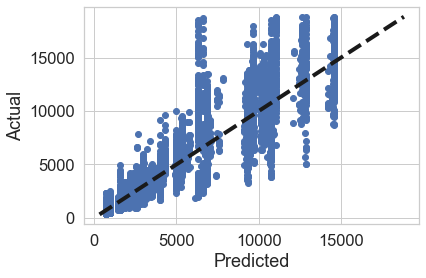

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Validation using out-of-bag method
# changing the values of hyperparameters
rf2 = RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=0,max_depth=4) # CHANGE AND EXPERIMENT
rf2.fit(X_train, y_train)

y_pred = rf2.predict(X_train)

#performance measure of the training model
# RMSE & R^2 Computation
rmse = np.sqrt(MSE(y_train, y_pred))
print("Training data RMSE : % f" %(rmse))
r2 = r2_score(y_train, y_pred)
print("Training data R^2 : % f" %(r2))

print("......................")
#performance measure of the test data
#RMSE & R^2 computation

y_pred_test= rf2.predict(X_test)

rmse_test = np.sqrt(MSE(y_test, y_pred_test))
print("Test data RMSE : % f" %(rmse_test))
r2_test = r2_score(y_test, y_pred_test)
print("Test data R^2 : % f" %(r2_test))


# Plot the linear regression curve
fig, ax = plt.subplots()
ax.scatter(y_pred, y_train)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()



## Random Forest Regression V3 # 

### Increase the Depth of Decision Trees in the Forest

Training data RMSE :  417.929124
Training data R^2 :  0.985215
......................
Test data RMSE :  459.521391
Test data R^2 :  0.981836


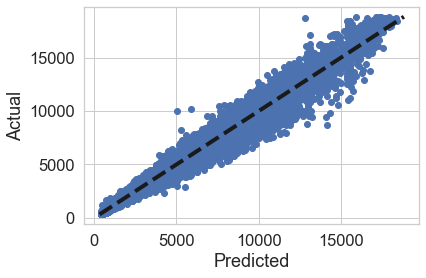

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Validation using out-of-bag method
# changing the values of hyperparameters
rf3 = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=0,max_depth = 10) # CHANGE AND EXPERIMENT
rf3.fit(X_train, y_train)
y_pred = rf3.predict(X_train)

#performance measure of the training model
# RMSE & R^2 Computation
rmse = np.sqrt(MSE(y_train, y_pred))
print("Training data RMSE : % f" %(rmse))
r2 = r2_score(y_train, y_pred)
print("Training data R^2 : % f" %(r2))

print("......................")
#performance measure of the test data
#RMSE & R^2 computation

y_pred_test= rf3.predict(X_test)

rmse_test = np.sqrt(MSE(y_test, y_pred_test))
print("Test data RMSE : % f" %(rmse_test))
r2_test = r2_score(y_test, y_pred_test)
print("Test data R^2 : % f" %(r2_test))


# Plot the linear regression curve
fig, ax = plt.subplots()
ax.scatter(y_pred, y_train)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

### Comparing between the 3 versions of Random Forest Regression using the test data# 

| Random Forest Regression  |      RMSE |    R^2    |        |      
| :---              | :---: | :----: | :----: |         
| V1   |  1036.3 |  0.907 |      |             
| V2   |  1039.3  |  0.907  |     |       
|    V3               |     459.5  |   0.981  |      |       
|                   |       |   |     |     


Best Model: Random Forest Regression V3

Based on our results of our performance indicators, we can conculde that random forest regression V3 is the best model among the 3 as it has the lowest RMSE value and the highest R^2 value, which tells us that the model will give the most accurate prediction of the price of diamond, with the least error. 

We can learn that the (max_depth) hyperparameter is the most important for random forest as the depth of the decision trees affect the accuracy of the model the most. (higher depth = more accuracy)


Furthermore, looking at the graphs drawn we can see that points of the random forest V3 has a overall better linear shape compared to V1,V2. 


## XGBOOST Regression V1 ##

After we use the 'Random Forest Regression', we have obtained a training model which is low in RMSE value and high in R^2 value. We would like to explore another regression model, which is 'XGBOOST Regression' to find out whether we can obtain a better and more efficient training model.

Why are we using `XGBOOST Regression`?

XGBOOST stands for eXtreme Gradient Boosting, which is an advanced implementation of a gradient boosting algorithm. This algorithm is able to handle large datasets and achieve state-of-the-art performance in many machine learning tasks such as classification and regression. XGBoost has built-in support for parallel processing, which makes it possible to train models on large datasets in a reasonable amount of time. XGBoost also allows users to fine-tune parameters to optimize the training performance.

In this algorithm, decision trees are created in sequential form. Weights play an important role in XGBoost. Weights are assigned to all the independent variables which are then fed into the decision tree which predicts results. The weight of variables predicted wrong by the tree is increased and the variables are then fed to the second decision tree.

We believe that xgboost regression might be suitable for our dataset as it contains a larger number of categorical variables with many classes in the data which indicates high cardinality. And XGboost can handle data with high cardinality with the help of label encoding. Furthermore , it uses decesion trees similar to random forest, thus it can handle the non-linear relationship of our categorical variables such as cut with the price of diamond (response variable).

We have included 5 parameters for tuning to obtain the best training performance:

* **n_estimator**      : Number of trees or rounds in a model
* **max_depth**        : Used to control the over-fitting
* **eta**              : Make the model more robust by shrinking the weights on each step
* **subsample**        : Fraction of observations to be random samples for each tree
* **colsample_bytree** : Fraction of columns to be random samples for each tree


C:\Anaconda\lib\site-packages\xgboost\compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Training data RMSE :  964.647635
Training data R^2 :  0.921229
......................
Test data RMSE :  955.173298
Test data R^2 :  0.921518


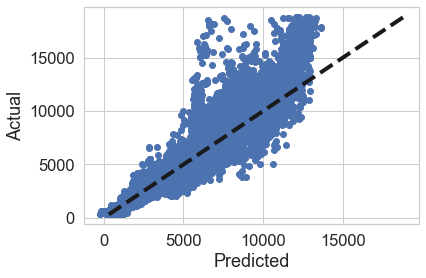

In [55]:
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

xgb_r2 = xg.XGBRegressor(n_estimators=500, max_depth=3, eta=0.01, subsample=0.5, colsample_bytree=0.5)

# Fitting the model
xgb_r2.fit(X_train, y_train)
  
# Predict the model
pred_try1 = xgb_r2.predict(X_train)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_train, pred_try1))
print("Training data RMSE : % f" %(rmse))
r2 = r2_score(y_train, pred_try1)
print("Training data R^2 : % f" %(r2))

print("......................")

# Predict the model
predt1 = xgb_r2.predict(X_test)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test, predt1))
print("Test data RMSE : % f" %(rmse))
r21 = r2_score(y_test, predt1)
print("Test data R^2 : % f" %(r21))

# Plot the linear regression curve
fig, ax = plt.subplots()
ax.scatter(pred_try1, y_train)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

## 'Tuning of Hyperparameters' for the Random Forest Regression ###

The current regression model seems to have high RMSE and R^2 values may be possible to be increased. Hence, we decided to tune the 5 parameters used to make our model better.

The details of the 5 parameters are given in the ealier part of the report under **XGBOOST Regression V1**

## XGBOOST Regression V2 ##

**Increase the n_estimators, max_depth, eta,  subsample and colsample_bytree**

Training data RMSE :  306.431411
Training data R^2 :  0.992051
......................
Test data RMSE :  483.545831
Test data R^2 :  0.979887


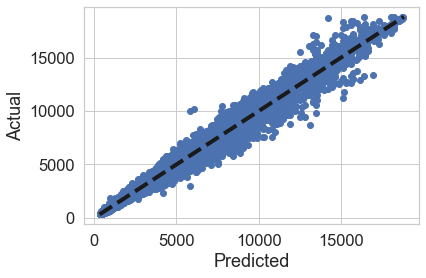

In [56]:
xgb_r3 = xg.XGBRegressor(n_estimators=2000, max_depth=10, eta=0.2, subsample=1, colsample_bytree=1)

# Fitting the model
xgb_r3.fit(X_train, y_train)
  
# Predict the model
pred_try2 = xgb_r3.predict(X_train)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_train, pred_try2))
print("Training data RMSE : % f" %(rmse))
r2 = r2_score(y_train, pred_try2)
print("Training data R^2 : % f" %(r2))

print("......................")

# Predict the model
predt2 = xgb_r3.predict(X_test)

# RMSE Computation
rmse = np.sqrt(MSE(y_test, predt2))
print("Test data RMSE : % f" %(rmse))
r21 = r2_score(y_test, predt2)
print("Test data R^2 : % f" %(r21))

# Plot the linear regression curve
fig, ax = plt.subplots()
ax.scatter(pred_try2, y_train)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

## XGBOOST Regression V3 ##

**Slightly decrease the n_estimators, max_depth, eta,  subsample and colsample_bytree**

Training data RMSE :  341.589050
Training data R^2 :  0.990123
......................
Test data RMSE :  465.698295
Test data R^2 :  0.981344


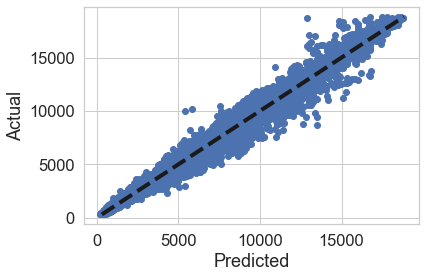

In [57]:
xgb_r = xg.XGBRegressor(n_estimators=1000, max_depth=8, eta=0.1, subsample=0.7, colsample_bytree=0.8)

# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
pred = xgb_r.predict(X_train)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_train, pred))
print("Training data RMSE : % f" %(rmse))
r2 = r2_score(y_train, pred)
print("Training data R^2 : % f" %(r2))

print("......................")


# Predict the model
predt = xgb_r.predict(X_test)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test, predt))
print("Test data RMSE : % f" %(rmse))
r21 = r2_score(y_test, predt)
print("Test data R^2 : % f" %(r21))

# Plot the linear regression curve
fig, ax = plt.subplots()
ax.scatter(pred, y_train)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

### Comparing between the 3 versions of XGBOOST Regression using the test data ###

| XGBOOST Regression  |      RMSE |   R^2    |        |      
| :---              | :---: | :----: | :----: |         
| V1   |  955.2 |  0.92 |      |             
| V2   |  483.5  |  0.98  |     |       
|    V3               |     465.7  |   0.98  |      |       
|                   |       |   |     |     


**Best Model: XGBOOST Regression V3**

Based on our results of our performance indicators, we can conculde that XGBOOST regression V3 is the best model among the 3 as it has the lowest RMSE value and the highest R^2 value, which tells us that the model will give the most accurate prediction of the price of diamond, with the least error. 

If we obserbve the result of performance for training data in XGBOOST regression V2, even though the RMSE value for training data is lower than RMSE value for training data in XGBOOST regression V3, we cannot conclude that XGBOOST regression V2 gives us the most accurate result because there might be **over-fitting** issue happening in the model when the parameters are overtuned, which means the model are bias to the input training data. Therefore, we can observe that the model from XGBOOST regression V2 gives higher RMSE value for the test data due the overfitted prediction model.


Furthermore, looking at the graphs drawn we can see that V2 and V3 has similar linear best fit line, which means these 2 models are actually similar to each other because both models give the same R^2 value. With that, we decided to choose XGBOOST regression V3 as the best model due to the lower RMSE value.

## Comparing the 3 Regression Models
| Regression Model  |      RMSE |   R^2    |        |      
| :---              | :---: | :----: | :----: |         
| Linear   |  1266.3 |  0.86 |      |             
| Random Forest   |  459.5  |  0.98  |     |       
|    XGBOOST               |     465.7  |   0.98  |      |       
|                   |       |   |     |     


After we explore the 3 regression models mentioned earlier, we then compare the prediction results among these 3 models. We can see that RMSE value for Linear Regression is the highest, followed by XGBOOST and Random Forest. The R^2 value for Random Forest and XGBOOST is the same, but the RMSE value is different, which means that Random Forest can predict the model more accurately compared to XGBOOST due to the lower prediction error.

The reason why Random Forest Regression is better than XGBoost could be that the imbalance in our categorical data(skewed class proportions) might create biaseness towards a certain class. Random forest handles this well as it creates decision trees that are not biased towards the majority class. It can generate balanced splits during tree building, which can help in handling imbalanced data effectively. XGBoost Regression may require additional techniques such as weighted loss functions or oversampling/undersampling to handle imbalanced data. 

XGBoost might require futher optimizations to handle large dataset like ours such as subsampling and parallization but random forest doesnt require any optimization to handle such dataset.

Therefore, we can conclude that Random Forest will be the most suitable model to use based on the training result. XGBOOST is also a suitable model due to the low RMSE result and the high R2 value compared to Linear Regression. 

**With that, we decided to choose Random Forest as the model to help us predict the diamond price in the next step.**


## Prediction of Diamond Price

After we decide on the prediction model, we proceed on to justify the efficiency of the prediction model through predicting a diamond price and compare the prediction result with the actual diamond price.

We randomly extracted one of the data in the test set, then use this randomly generated test case to make a prediction on the diamond price based on **CARAT, CUT, COLOUR and CLARITY**. 

In [62]:
import random

number = random.randint(1, 53943)
sample = pd.concat([x,y], axis="columns")

test = sample[number-1:number]
test

,CARAT,CUT,COLOR,CLARITY,PRICE
13653,1.09,4,6,6,5588


In [63]:
# Predict the model
pred1 = rf3.predict(test.drop([ 'PRICE'],axis=1))
print("Predicted price: ", pred1)

Predicted price:  [5684.75150714]


Based on the extracted data, the actual price of a diamond with 1.09 CARAT, 6 CUT, 1 COLOUR AND 6 CLARITY is $ \$5588. $ 
The prediction model gives the predicted price of the diamond at $ \$5684.7.$


There might be some offset space for the prediction result, but the prediction result is still close to the actual price. Hence, we believe that this result can serve as an indicator or reference for customers to estimate the price of the diamond so that they will not purchase the diamond with an unreasonable price.


## Diamond Price Calculator

We also make an *UI* for the customers to predict the diamond price by indicating the value of each variable. The result will then be generated immediately. This will ease the prediction process for the customers with just a few clicks of actions and allow them to predict the price in a short time.

In [ ]:
import tkinter as tk
from PIL import Image, ImageTk
from tkinter import *
import random

fields = ('CARAT', 'CUT','COLOR', 'CLARITY')

def calculation(entries):

    #Getting the input 
    CARAT = float(entries['CARAT'].get())
    CUT = float(entries['CUT'].get())
    COLOR = float(entries['COLOR'].get())
    CLARITY = float(entries['CLARITY'].get()) 
    
    d = {'CARAT': [CARAT], 'CUT': [CUT], 'COLOR': [COLOR], 'CLARITY': [CLARITY]}
    sample = pd.DataFrame(data=d)    
    pred1 = rf3.predict(sample)

    label = Label(root, text= "Predicted Price: " + str(pred1))
    label.pack() 

def makeform(root, fields):
    entries = {}
    for field in fields:
        print(field)
        row = tk.Frame(root)
        lab = tk.Label(row, width=22, text=field+": ", anchor='w')
        ent = tk.Entry(row)
        ent.insert(0, "0")
        row.pack(side=tk.TOP, 
                 fill=tk.X, 
                 padx=5, 
                 pady=5)
        lab.pack(side=tk.LEFT)
        ent.pack(side=tk.RIGHT, 
                 expand=tk.YES, 
                 fill=tk.X)
        entries[field] = ent
    return entries

if __name__ == '__main__':
    root = tk.Tk()
    root.title('Diamond Price Calculator')
    ents = makeform(root, fields)
    b1 = tk.Button(root, text='Predict',
           command=(lambda e=ents: calculation(e)))
    b1.pack(side=tk.LEFT, padx=5, pady=5)
    b3 = tk.Button(root, text='Quit', command=root.quit)
    b3.pack(side=tk.RIGHT, padx=5, pady=5)
    root.bind('<Return>', lambda event=None: b1.invoke())

    root.mainloop()

# Conclusion #

1. In conclusion, we have successfully set up a prediction model using Random Forest regression in this project which can help customers to estimate the price of a diamond based on carat, cut, colour and clarity. Throughout the preparation and experimentation process, we have faced different limitations including the large dataset used which will be difficult for us to observe in detail. Hence, with the proper use of different graphs and plots, we are able to understand the details clearly such as the spread of data, trend of data and relationship between the variables. We also faced difficulty when setting up the regression model because the dataset contains a lot of categorical data, which limits us to perform regression in the training process. 



2. By implementing  label encoding, we successfully convert the categorical data to numerical data, where we can now include the categorical data in our regression model as well. For the future improvement on our project, we aim to explore more hyperparameters in the regression model so that we can further optimize the training model. We also hope to include more predictors such as the dimension of diamond if the information about the predictors are more readily accessible to the customer in the future. 